In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

/kaggle/input/creditcardfraud/creditcard.csv


# Introduction

This is my ML side project. In this project, I would try to detect fraud credit card transaction on a highly imbalanced dataset, in which there are over 99% genuine transactions and only less than 1% transactions are considered fraud. 

## Part 1: Explorartory Analysis

In [2]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()

In [ ]:
# df['Class'].value_counts()
print("Non-fraud: ", round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of our data')
print("fraud: ", round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of our data')

In [ ]:
# fig, ax = plt.subplots(1, 4, figsize=(15,5))

# sns.distplot(df['V1'], ax = ax[0])
# ax[0].set_title('Distribution of V1', fontsize = 14)
# ax[0].set_xlim([min(df['V1'].values), max(df['V1'].values)])

# sns.distplot(df['V2'], ax = ax[1])
# ax[1].set_title('Distribution of V2', fontsize = 14)
# ax[1].set_xlim([min(df['V2'].values), max(df['V2'].values)])

# sns.distplot(df['V3'], ax = ax[2])
# ax[1].set_title('Distribution of V3', fontsize = 14)
# ax[1].set_xlim([min(df['V3'].values), max(df['V3'].values)])

# sns.distplot(df['V4'], ax = ax[3])
# ax[1].set_title('Distribution of V4', fontsize = 14)
# ax[1].set_xlim([min(df['V4'].values), max(df['V4'].values)])

In [ ]:
# Except `Amount` and `Time`, other features have been scaled
fig, ax = plt.subplots(1, 2, figsize=(15,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1])
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


As I explored the dataset, I found that:
    
1. The dataset is highly skewed. There are more than **99%** genuine transaction in the dataset, but less than **1%** fraud transaction.
2. There are no missing values in the dataset.
3. The features `Amount` and `Time` have not been scaled properly.

## Part 2: Preprocessing

At this stage, we need to do 3 things:

1. Scale `Amount` and `Time`
2. Split the original data into train set and test set

In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler() # standard scaler
rob_scaler = RobustScaler() # IQR, robust to outlier

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-0.9949834936970594, 1.0350215580540185)

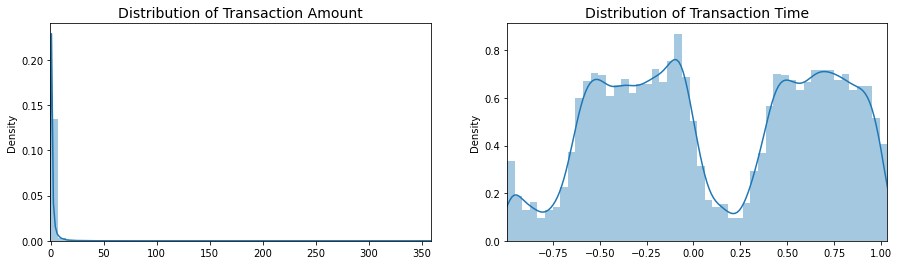

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))

amount_val = df['scaled_amount'].values
time_val = df['scaled_time'].values

sns.distplot(amount_val, ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1])
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

In [6]:
# Spliting the original dataset

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [     0      1      2 ... 284804 284805 284806] Test: [     5      7      9 ... 284778 284793 284799]
Train: [     0      3      4 ... 284804 284805 284806] Test: [     1      2     13 ... 284792 284797 284801]
Train: [     1      2      5 ... 284800 284801 284803] Test: [     0      3      4 ... 284804 284805 284806]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    14     19     27 ... 284795 284796 284800]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    11     15     22 ... 284791 284794 284803]


In [7]:
print(df['Class'].value_counts()[0]/df['Class'].value_counts()[1])
print(sum(original_ytrain == 0)/sum(original_ytrain == 1))
print(sum(original_ytest == 0)/sum(original_ytest == 1))

577.8760162601626
577.2893401015228
580.234693877551


In [8]:
# fraud vs. non-fraud ratio in original_train data
print("Non-fraud: ", round(original_ytrain.value_counts()[0]/len(original_ytrain) * 100, 2), '% of our data')
print("fraud: ", round(original_ytrain.value_counts()[1]/len(original_ytrain) * 100, 2), '% of our data')

Non-fraud:  99.83 % of our data
fraud:  0.17 % of our data


In [9]:
# fraud vs. non-fraud ratio in original_test data
print("Non-fraud: ", round(original_ytest.value_counts()[0]/len(original_ytest) * 100, 2), '% of our data')
print("fraud: ", round(original_ytest.value_counts()[1]/len(original_ytest) * 100, 2), '% of our data')

Non-fraud:  99.83 % of our data
fraud:  0.17 % of our data


In [ ]:
# print(df['Class'].value_counts()[0]/df['Class'].value_counts()[1])
# print(sum(y_train == 0)/sum(y_train == 1))
# print(sum(y_test == 0)/sum(y_test == 1))

## Part 3: Random Undersampling

The goal of this phase is to make balanced dataset for modeling through random undersampling technique. In this analysis, I choose to make a 50:50 subsampling.

In addition, I would like to check how are the features correlated with the transaction class. We should able to see some relationship there after we have a balanced dataset.

In [ ]:
# This is the code that I use the whole data to do random undersampling, which causes data leakage (100% accuracy knn)
# shuffle the data
# df_new = df.sample(frac = 1)

In [10]:
# to correct data leakage, use original train data to do random undersampling
original_Xtrain['Class'] = original_ytrain
df_new = original_Xtrain.sample(frac = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df_fraud = df_new[df_new['Class'] == 1]
df_genuine = df_new[df_new['Class'] == 0]

df_new = pd.concat([df_fraud, df_genuine[:len(df_fraud)]]) # undersampling

In [12]:
df_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
114271,-2.869795,1.335667,-1.009530,1.693885,-0.741480,-0.796773,-2.614242,1.066636,-1.135497,-3.943337,...,0.228027,-0.749298,-0.067179,0.215792,-0.453651,0.349191,0.198862,-0.077133,-0.132567,1
96789,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.128890,0.014963,-2.856117,...,0.391249,-0.252875,-0.498042,0.010172,0.909929,-1.478767,0.722673,1.110878,-0.220350,1
150647,-3.632809,5.437263,-9.136521,10.307226,-5.421830,-2.864815,-10.634088,3.018127,-4.891640,-11.235048,...,0.978660,-0.096130,0.432377,-0.435628,0.650893,1.693608,0.857685,-0.188081,0.107285,1
234632,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,...,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,-0.285195,0.744381,1
247673,-5.192496,3.164721,-5.047679,2.246597,-4.011781,-0.638908,-2.873463,1.576318,-2.861986,-2.120458,...,-1.006617,0.774562,0.063397,-0.390658,1.884741,-1.742558,-0.082216,3.156012,0.810172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123502,-2.096059,1.769130,-0.623790,-2.845440,1.985574,3.087322,-0.014879,1.029055,1.184082,1.483344,...,-0.648133,-0.025132,1.007505,0.176549,0.765523,0.987794,0.607090,-0.256131,-0.090885,0
70549,0.345137,-1.539396,0.077638,1.316540,-0.578167,1.243242,-0.182395,0.356938,0.622784,-0.094318,...,0.296489,-0.619332,-1.129524,0.447134,-0.143987,-0.019961,0.077838,5.754209,-0.361541,0
158483,1.994420,-1.224008,-2.037309,-2.579303,-0.386048,-1.205524,-0.036939,-0.488897,1.734457,-0.642539,...,-0.098676,-0.023506,0.717107,0.287267,-0.808116,-0.020681,-0.044784,1.522811,0.312821,0
227073,1.951670,-0.465353,-0.264271,0.222901,-0.750762,-0.450960,-0.614251,-0.047508,1.370658,-0.245359,...,0.838889,0.196296,1.209604,-0.180272,0.062515,0.013842,-0.027126,0.001118,0.707633,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

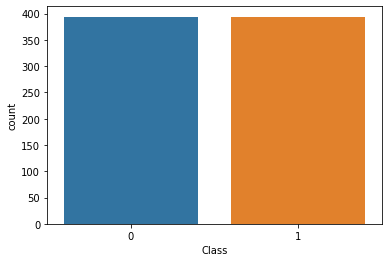

In [13]:
sns.countplot('Class', data=df_new)

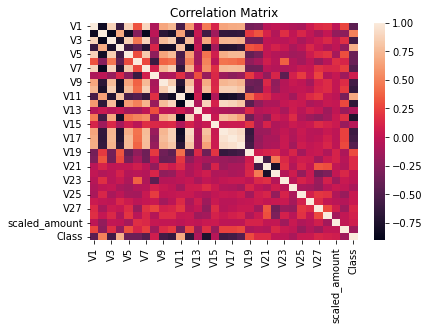

In [14]:
# Check correlation
cor = df_new.corr()

sns.heatmap(cor).set(title = "Correlation Matrix")
sns.set(rc = {'figure.figsize':(20,12)})

The plot shows that:

- Variables that are (highly) **negatively correlated** to the Class: V2, V4, V11
- Variables that are (highly) **negatively correlated** to the Class: V1, V3, V7, V10, V12, V14, V16, V17

Variables that are negatively (positively) correlated to the `Class` implies that they are more likely to make this transaction fraud as they decrease (increase). 

In [ ]:
# Anomalty Detection (outlier)

## Part 4: Fitting Classifiers

In this phrase, I'm going to fit 4 models and see which one will be the king in detecting fraud transaction.

**summary:**

According to the Area under Precision-recall Curve, I found that logistic regression and random forest are the 2 top performances out of 4.

In [15]:
X = df_new.drop('Class', axis = 1)
y = df_new['Class']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
classifiers = {
    "Logistic Regression": LogisticRegression(random_state = 42), 
    "KNN": KNeighborsClassifier(),
    "Random Forest":  RandomForestClassifier(max_depth=2, random_state = 42),
    "Support Vector Machine": SVC()
}

In [19]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(key, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy")

Logistic Regression Has a training score of 95.0 % accuracy
KNN Has a training score of 93.0 % accuracy
Random Forest Has a training score of 93.0 % accuracy
Support Vector Machine Has a training score of 93.0 % accuracy


In [20]:
# Tunning Parameters

# logistic Regression
logit_param = {"penalty": ['l1', 'l2', 'elasticnet'], 
               "C": [0.001, 0.01, 0.1, 1, 10, 100]}

lg = GridSearchCV(LogisticRegression(), logit_param)
lg.fit(X_train, y_train)
lg_clf = lg.best_estimator_

# KNN
knn_param = {'n_neighbors': [3, 4, 5, 7, 9], 
             'weights': ['uniform', 'distance'], 
            }

knn = GridSearchCV(KNeighborsClassifier(), knn_param)
knn.fit(X_train, y_train)
knn_clf = knn.best_estimator_


# Random Forest
rf_param = {'max_depth': [2, 3], 
           "min_samples_split": [2, 3, 4]}
rf = GridSearchCV(RandomForestClassifier(), rf_param)
rf.fit(X_train, y_train)
rf_clf = rf.best_estimator_


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [21]:
# SVC
svc_param = {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'], 
            'C': [0.1, 0.3, 0.5, 0.7, 0.9]}
svc = GridSearchCV(SVC(), svc_param)
svc.fit(X_train, y_train)
svc_clf = svc.best_estimator_

In [22]:
lg_score = cross_val_score(lg_clf, X_train, y_train, cv=5)
knn_score = cross_val_score(knn_clf, X_train, y_train, cv=5)
rf_score = cross_val_score(rf_clf, X_train, y_train, cv=5)
svc_score = cross_val_score(svc_clf, X_train, y_train, cv=5)

In [23]:
print("Accuracy:")
print("Logistic Regression: ", round(lg_score.mean()*100, 2), "%")
print("KNN: ", round(lg_score.mean()*100, 2), "%")
print("Random Forest: ", round(lg_score.mean()*100, 2), "%")
print("SVC: ", round(lg_score.mean()*100, 2), "%")

print([lg_score.mean(), knn_score.mean(), rf_score.mean(), svc_score.mean()])

Accuracy:
Logistic Regression:  94.6 %
KNN:  94.6 %
Random Forest:  94.6 %
SVC:  94.6 %
[0.946031746031746, 0.9349206349206348, 0.9380952380952381, 0.946031746031746]


In [24]:
# Check the learning curves of estimators
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [25]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
train_sizes_1, train_scores_1, test_scores_1 = learning_curve(lg_clf, X, y, cv = cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
train_sizes_2, train_scores_2, test_scores_2 = learning_curve(knn_clf, X, y, cv = cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
train_sizes_3, train_scores_3, test_scores_3 = learning_curve(rf_clf, X, y, cv = cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
train_sizes_4, train_scores_4, test_scores_4 = learning_curve(svc_clf, X, y, cv = cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))

In [26]:
train_scores_1_mean = np.mean(train_scores_1, axis=1)
test_scores_1_mean = np.mean(test_scores_1, axis=1)

train_scores_2_mean = np.mean(train_scores_2, axis=1)
test_scores_2_mean = np.mean(test_scores_2, axis=1)


train_scores_3_mean = np.mean(train_scores_3, axis=1)
test_scores_3_mean = np.mean(test_scores_3, axis=1)

train_scores_4_mean = np.mean(train_scores_4, axis=1)
test_scores_4_mean = np.mean(test_scores_4, axis=1)

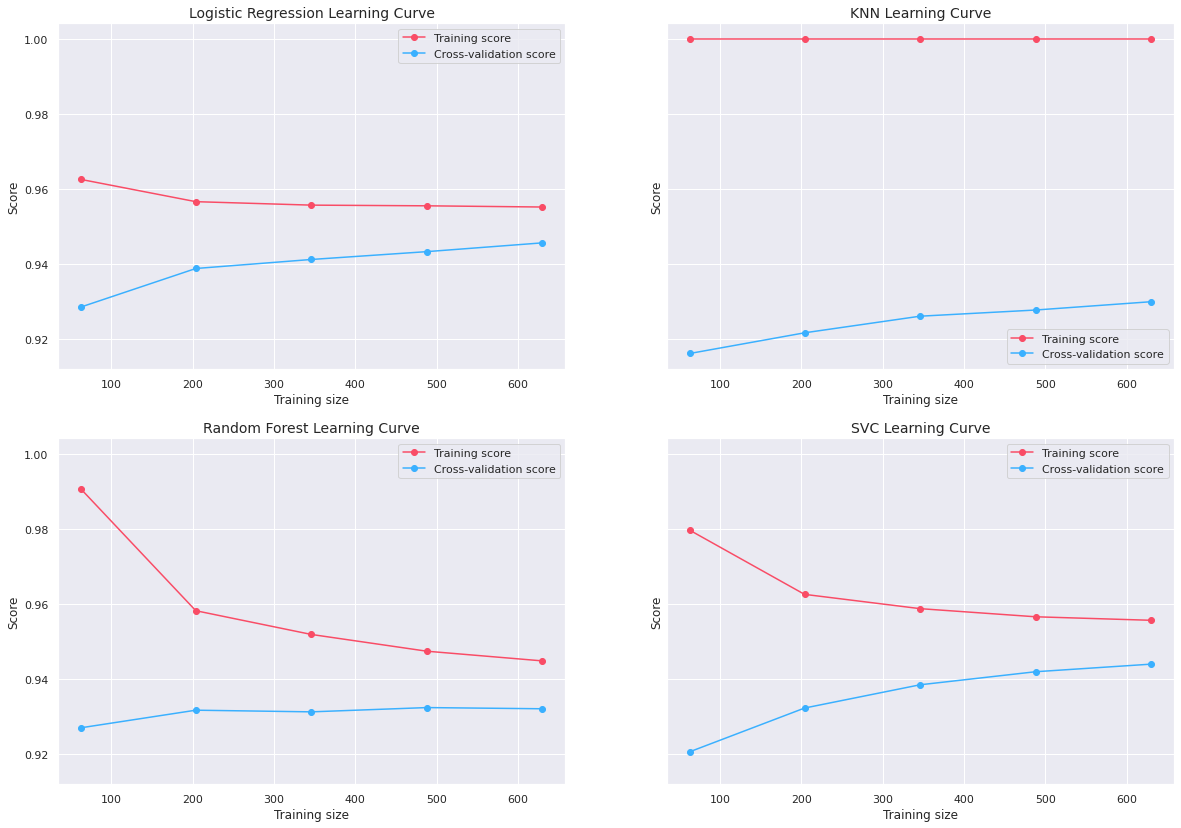

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)

ax1.plot(train_sizes_1, train_scores_1_mean, 'o-', color="#F94C66",
         label="Training score")
ax1.plot(train_sizes_1, test_scores_1_mean, 'o-', color="#3AB0FF",
         label="Cross-validation score")
ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
ax1.set_xlabel('Training size')
ax1.set_ylabel('Score')
ax1.grid(True)
ax1.legend(loc="best")


ax2.plot(train_sizes_2, train_scores_2_mean, 'o-', color="#F94C66",
         label="Training score")
ax2.plot(train_sizes_2, test_scores_2_mean, 'o-', color="#3AB0FF",
         label="Cross-validation score")
ax2.set_title("KNN Learning Curve", fontsize=14)
ax2.set_xlabel('Training size')
ax2.set_ylabel('Score')
ax2.grid(True)
ax2.legend(loc="best")


ax3.plot(train_sizes_3, train_scores_3_mean, 'o-', color="#F94C66",
         label="Training score")
ax3.plot(train_sizes_3, test_scores_3_mean, 'o-', color="#3AB0FF",
         label="Cross-validation score")
ax3.set_title("Random Forest Learning Curve", fontsize=14)
ax3.set_xlabel('Training size')
ax3.set_ylabel('Score')
ax3.grid(True)
ax3.legend(loc="best")


ax4.plot(train_sizes_4, train_scores_4_mean, 'o-', color="#F94C66",
         label="Training score")
ax4.plot(train_sizes_4, test_scores_4_mean, 'o-', color="#3AB0FF",
         label="Cross-validation score")
ax4.set_title("SVC Learning Curve", fontsize=14)
ax4.set_xlabel('Training size')
ax4.set_ylabel('Score')
ax4.grid(True)
ax4.legend(loc="best")


In [28]:
# Compare Models using ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

In [29]:
lg_pred = lg_clf.predict_proba(X_train)[:, 1]
knn_pred = knn_clf.predict_proba(X_train)[:, 1]
rf_pred = rf_clf.predict_proba(X_train)[:, 1]
svc_pred = cross_val_predict(svc_clf, X_train, y_train, cv=5, method="decision_function")

In [30]:
print("AUC score")
print("Logistic Regression:", roc_auc_score(y_train, lg_pred))
print("KNN:", roc_auc_score(y_train, knn_pred))
print("Random Forest:", roc_auc_score(y_train, rf_pred))
# print(roc_auc_score(y_train, svc_clf.predict_proba(X_train)[:, 1]))
print("SVC:", roc_auc_score(y_train, svc_pred))

AUC score
Logistic Regression: 0.9886300638046951
KNN: 1.0
Random Forest: 0.9890130935701398
SVC: 0.9782781804070195


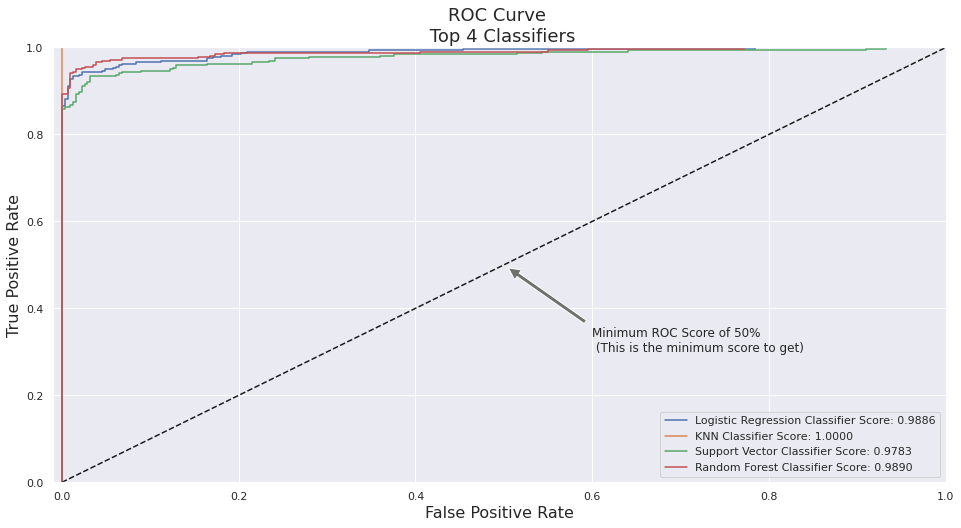

In [31]:
lg_fpr, lg_tpr, lg_thresold = roc_curve(y_train, lg_pred)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_train, knn_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, rf_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)



def graph_roc_curve_multiple(lg_fpr, lg_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(lg_fpr, lg_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, lg_pred)))
    plt.plot(knn_fpr, knn_tpr, label='KNN Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knn_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, rf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(lg_fpr, lg_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr)
plt.show()

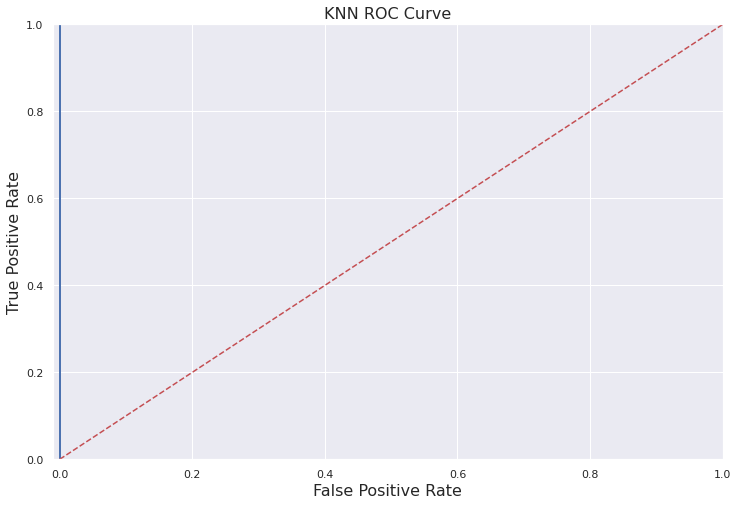

In [32]:
# Let's dive deep into KNN Classifier

def knn_roc_curve(knn_fpr, knn_tpr):
    plt.figure(figsize=(12,8))
    plt.title('KNN ROC Curve', fontsize=16)
    plt.plot(knn_fpr, knn_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
knn_roc_curve(knn_fpr, knn_tpr)
plt.show()

### Let's Consider using Precision-recall Curve instead of ROC Curve

Text(0.5, 1.0, 'Precision-Recall curve')

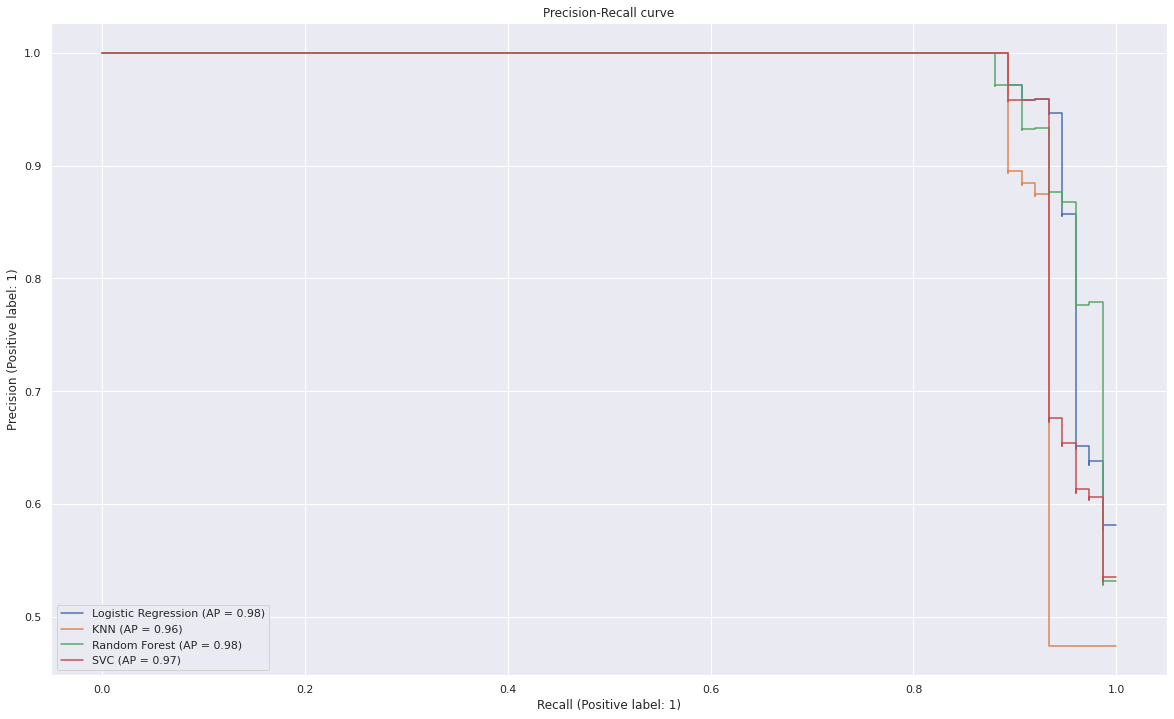

In [99]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

PrecisionRecallDisplay.from_estimator(lg_clf, X_test, y_test, ax = plt.gca(),name = "Logistic Regression")

PrecisionRecallDisplay.from_estimator(knn_clf, X_test, y_test, ax = plt.gca(),name = "KNN")

PrecisionRecallDisplay.from_estimator(rf_clf, X_test, y_test, ax = plt.gca(),name = "Random Forest")

PrecisionRecallDisplay.from_estimator(svc_clf, X_test, y_test, ax = plt.gca(), name = "SVC")

plt.title('Precision-Recall curve')

## Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)



In [ ]:
# Possible Improvements

## Part 5: Testing

In [33]:
# Test on validation set (test set from df_new)
from sklearn.metrics import confusion_matrix


y_pred_lg = lg_clf.predict(X_test)
y_pred_knn = knn_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_svc = svc_clf.predict(X_test)

lg_cf = confusion_matrix(y_test, y_pred_lg)
knn_cf = confusion_matrix(y_test, y_pred_knn)
svc_cf = confusion_matrix(y_test, y_pred_svc)
rf_cf = confusion_matrix(y_test, y_pred_rf)

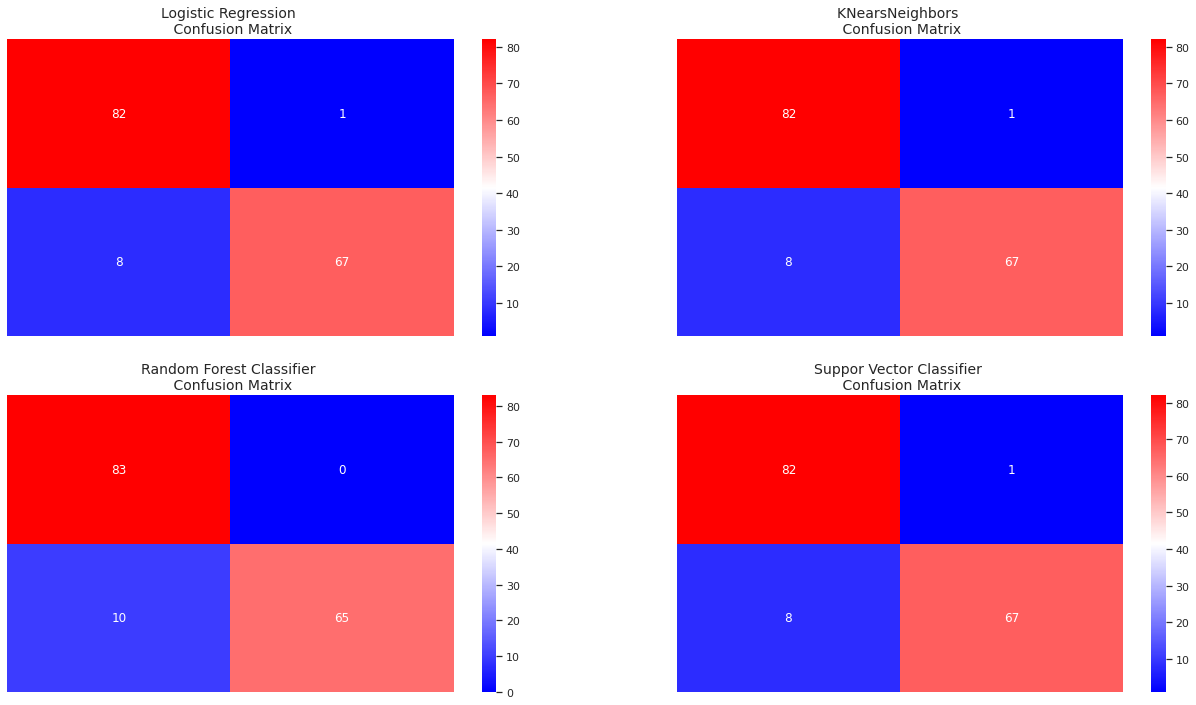

In [34]:
fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(lg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.bwr)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(knn_cf, ax=ax[0][1], annot=True, cmap=plt.cm.bwr)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rf_cf, ax=ax[1][0], annot=True, cmap=plt.cm.bwr)
ax[1][0].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][1], annot=True, cmap=plt.cm.bwr)
ax[1][1].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [35]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_lg))

print('KNN:')
print(classification_report(y_test, y_pred_knn))

print('Ranfom Forest:')
print(classification_report(y_test, y_pred_rf))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        83
           1       0.99      0.89      0.94        75

    accuracy                           0.94       158
   macro avg       0.95      0.94      0.94       158
weighted avg       0.95      0.94      0.94       158

KNN:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        83
           1       0.99      0.89      0.94        75

    accuracy                           0.94       158
   macro avg       0.95      0.94      0.94       158
weighted avg       0.95      0.94      0.94       158

Ranfom Forest:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        83
           1       1.00      0.87      0.93        75

    accuracy                           0.94       158
   macro avg       0.95      0.93      0.94       158
weighted avg       0.94      0.94



## See model performance in the original test dataset

In [41]:
np.mean(knn_clf.predict(original_Xtest) == original_ytest)

0.9746493214655642

In [43]:
np.mean(lg_clf.predict(original_Xtest) == original_ytest)

0.977230034585067

In [44]:
np.mean(rf_clf.predict(original_Xtest) == original_ytest)

0.9899580414669686

In [45]:
np.mean(svc_clf.predict(original_Xtest) == original_ytest)

0.9744035392637067

# Problems Encountered:

1. Information Loss (downsampling) => affecting accuracy
2. Random Undersampling on the whole data => data leakage (involve test data)    
3. ROC vs. Precision-recall

# Possible Improvement

1. Anomalty detection (for V's). Try getting rid of some extreme values (outliers)
2. Oversampling
3. Try Neural Network